## 1. Which team has won the most matches in the given dataset?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset (Assuming the dataset is in CSV format)
file_path='matches.csv' #Replace with your actual file path
ipl_matches=pd.read_csv(file_path)

In [5]:
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [3]:
ipl_deliveries=pd.read_csv('deliveries.csv')

In [6]:
ipl_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [6]:
team_wins=ipl_matches['winner'].value_counts()
print("1.Team with the most wins:")
print(team_wins.head(1))
print("\n")

1.Team with the most wins:
winner
Mumbai Indians    92
Name: count, dtype: int64




# How does the toss  decision (bat or field)influence the match otcome?

In [7]:
#Create a new column to check if the toss winner is the match winner
ipl_matches['toss_match_win']=ipl_matches['toss_winner']==ipl_matches['winner']

#Group by toss decision and toss match outcome
toss_decision_outcome=ipl_matches.groupby(['toss_decision','toss_match_win']).size().unstack()
print("2.Toss decisiom influence on match outcome:")
print(toss_decision_outcome)
print("\n")

2.Toss decisiom influence on match outcome:
toss_match_win  False  True 
toss_decision               
bat               149    124
field             162    201




## 3.What percentage of matches were won by teams batting first versus teams fielding first?

In [8]:
#count the number of matches won by batting first (win_by_runs >0)and fielding first(win_by_wickets > 0)
bat_first_wins=ipl_matches[ipl_matches['win_by_runs']>0].shape[0]
field_first_wins=ipl_matches[ipl_matches['win_by_wickets']>0].shape[0]

total_matches=ipl_matches.shape[0]
bat_first_percentage=(bat_first_wins/total_matches)*100
field_first_percentage=(field_first_wins/total_matches)*100

print(f"3.percentage of matches won by batting first:{bat_first_percentage:.2f}%")
print(f"  Percentage of matches won by fielding first:{field_first_percentage:.2f}%")
print("\n")

3.percentage of matches won by batting first:45.13%
  Percentage of matches won by fielding first:53.30%




## 4.Which cities have hosted the most IPL matches?

In [9]:
city_matches=ipl_matches['city'].value_counts()
print("4.Cities that have hosted the most IPL matches:")
print(city_matches.head())
print("\n")

4.Cities that have hosted the most IPL matches:
city
Mumbai       85
Bangalore    66
Kolkata      61
Delhi        60
Hyderabad    49
Name: count, dtype: int64




## 5.How often does the toss-winning team go on to win the match?

In [10]:
toss_winner_wins=ipl_matches[ipl_matches['toss_winner']==ipl_matches['winner']].shape[0]
toss_winning_percentage=(toss_winner_wins/total_matches)*100
print(f"5.Percentage of matches where the toss_winning team also won the match:{toss_winning_percentage:.2f}%")
print("\n")

5.Percentage of matches where the toss_winning team also won the match:51.10%




# Visualizations

## 1.Bar chart:Total wins by each team

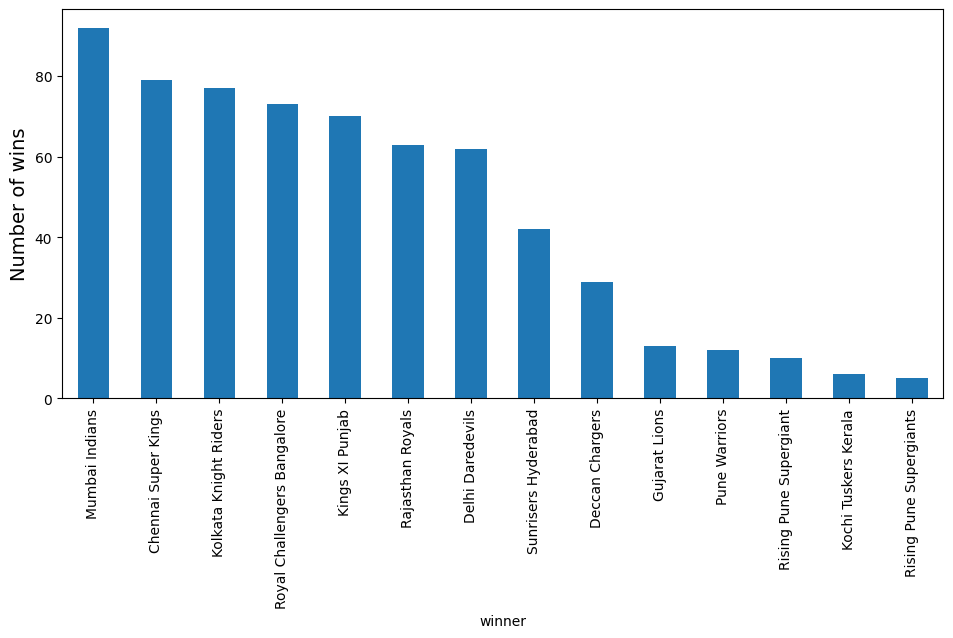

In [21]:
plt.figure(figsize=(10,6))
team_wins.plot(kind='bar',color='lightblue')
plt.xlabel('Total wins by Each Team',fontsize=10)
plt.ylabel('Number of wins',fontsize=14)
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
team_wins.plot(kind='bar')  
plt.show()




# 2.Bar chart:Toss decision influence on match outcome

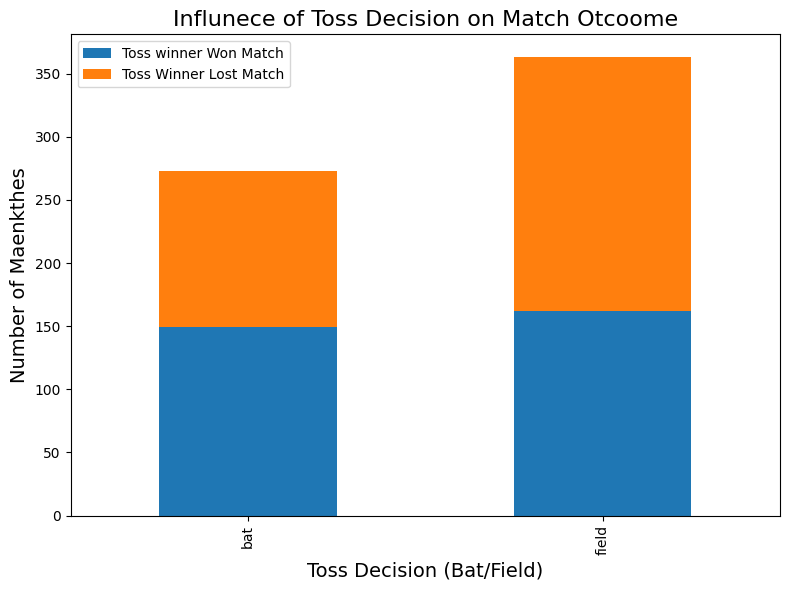

In [15]:
toss_decision_outcome.plot(kind='bar',stacked=True,figsize=(8,6))
plt.title('Influnece of Toss Decision on Match Otcoome',fontsize=16)
plt.xlabel('Toss Decision (Bat/Field)',fontsize=14)
plt.ylabel('Number of Maenkthes',fontsize=14)
plt.legend(['Toss winner Won Match','Toss Winner Lost Match'])
plt.tight_layout()
plt.show()

## 3.Pie chart:Percentage of matches won by batting first vs fielding first

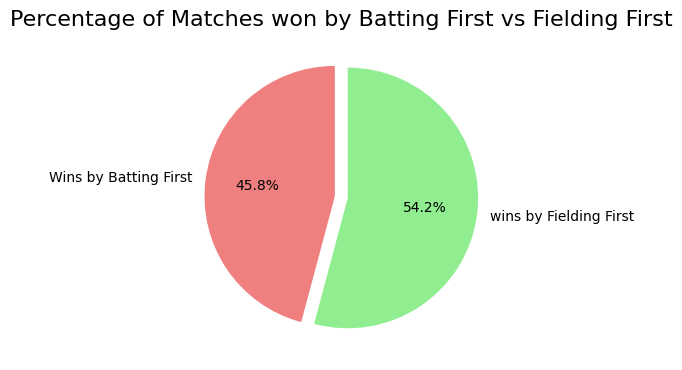

In [17]:
labels=['Wins by Batting First','wins by Fielding First']
sizes=[bat_first_percentage,field_first_percentage]
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,colors=['lightcoral','lightgreen'],explode=(0.05,0.05))
plt.title('Percentage of Matches won by Batting First vs Fielding First',fontsize=16)
plt.tight_layout()
plt.show() 

# 4.Bar chart:Cities hosting the most matches

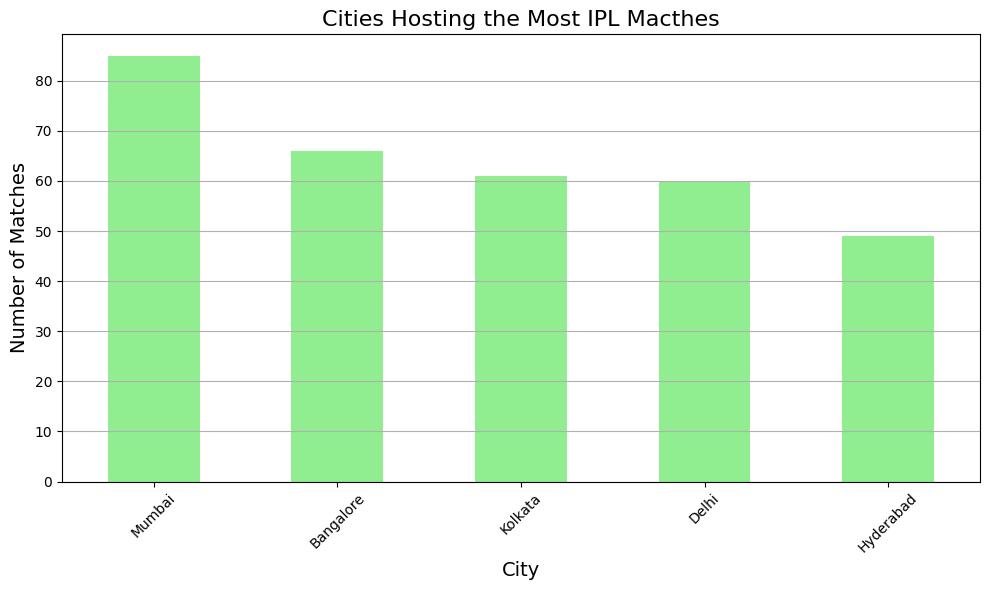

In [18]:
plt.figure(figsize=(10,6))
city_matches.head().plot(kind='bar',color='lightgreen')
plt.title('Cities Hosting the Most IPL Macthes',fontsize=16)
plt.xlabel('City',fontsize=14)
plt.ylabel('Number of Matches',fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Team Performance

## 1.Which team has the highest win margin (by runs or wickets)in the datset?

In [7]:
#For win by runs
max_run_margin=ipl_matches[ipl_matches['win_by_runs']==ipl_matches['win_by_wickets'].max()]
team_by_runs=max_run_margin['winner'].values[0]

#For win by wickets
max_wicket_margin=ipl_matches[ipl_matches['win_by_wickets']==ipl_matches['win_by_wickets'].max()]
team_by_wickets=max_wicket_margin['winner'].values[0]

print(f"Team with highest win margin by runs:{team_by_runs}")
print(f"Team with highest win margin by wickets:{team_by_wickets}")

Team with highest win margin by runs:Royal Challengers Bangalore
Team with highest win margin by wickets:Kolkata Knight Riders


## 2.What is the average winning margin(by runs)for teams batting first?


In [9]:
#Filter matches where teamswon by runs(batting first)
bat_first_wins=ipl_matches[ipl_matches['win_by_runs']>0]

#calculate the average mean
avg_margin=bat_first_wins['win_by_runs'].mean()
print(f"Average winning margin by runs for teams batting first:{avg_margin}")

Average winning margin by runs for teams batting first:30.320557491289197


## 3.Which teams has the highest success rate when chasing a target?


In [11]:
#Filter matches where teams won by wickets(chasing)
chasing_wins=ipl_matches[ipl_matches['win_by_wickets']>0]

#Calculate total matches played by each team while chasing
total_chasing_matches=ipl_matches[ipl_matches['team2']==ipl_matches['winner']].groupby('winner').size()

#calculate total wins by chasing
chasing_success=chasing_wins.groupby('winner').size()

#Success rate
success_rate=(chasing_success/total_chasing_matches).sort_values(ascending=False)

print("Teams with highest success rate when chasing:")
print(success_rate)

Teams with highest success rate when chasing:
winner
Deccan Chargers                1.000000
Delhi Daredevils               1.000000
Gujarat Lions                  1.000000
Kochi Tuskers Kerala           1.000000
Pune Warriors                  1.000000
Rajasthan Royals               1.000000
Rising Pune Supergiant         1.000000
Mumbai Indians                 0.977778
Royal Challengers Bangalore    0.976744
Chennai Super Kings            0.970588
Kolkata Knight Riders          0.958333
Kings XI Punjab                0.947368
Sunrisers Hyderabad            0.947368
Rising Pune Supergiants        0.600000
dtype: float64


## 4.What is the performance trend of a specific team across different seasons?

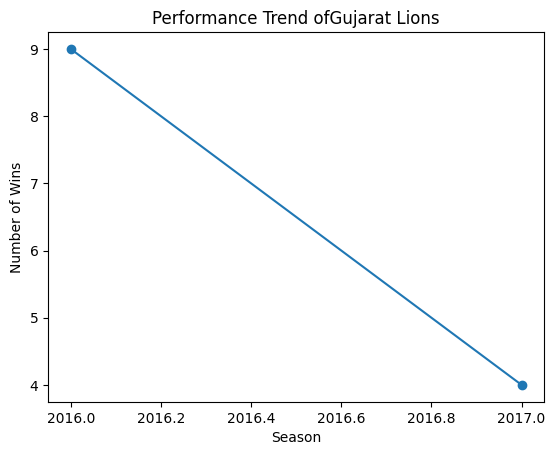

In [12]:
import matplotlib.pyplot as plt
team_name='Gujarat Lions'
team_performance=ipl_matches[ipl_matches['winner']==team_name].groupby('season').size()

#plot the performance trend
team_performance.plot(kind='line',marker='o',title=f'Performance Trend of{team_name}')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.show()

## 5.Which team won the most matches in each season?

In [13]:
#
season_winners=ipl_matches.groupby(['season','winner']).size().reset_index(name='wins')
#
most_wins_each_season=season_winners.loc[season_winners.groupby('season')['wins'].idxmax()]

print("Team with the most wins in each season:")
print(most_wins_each_season)

Team with the most wins in each season:
    season                 winner  wins
6     2008       Rajasthan Royals    13
10    2009       Delhi Daredevils    10
21    2010         Mumbai Indians    11
24    2011    Chennai Super Kings    11
38    2012  Kolkata Knight Riders    12
47    2013         Mumbai Indians    13
54    2014        Kings XI Punjab    12
60    2015    Chennai Super Kings    10
75    2016    Sunrisers Hyderabad    11
80    2017         Mumbai Indians    12


## 6.Distribution of matches played acrossed differnet cities

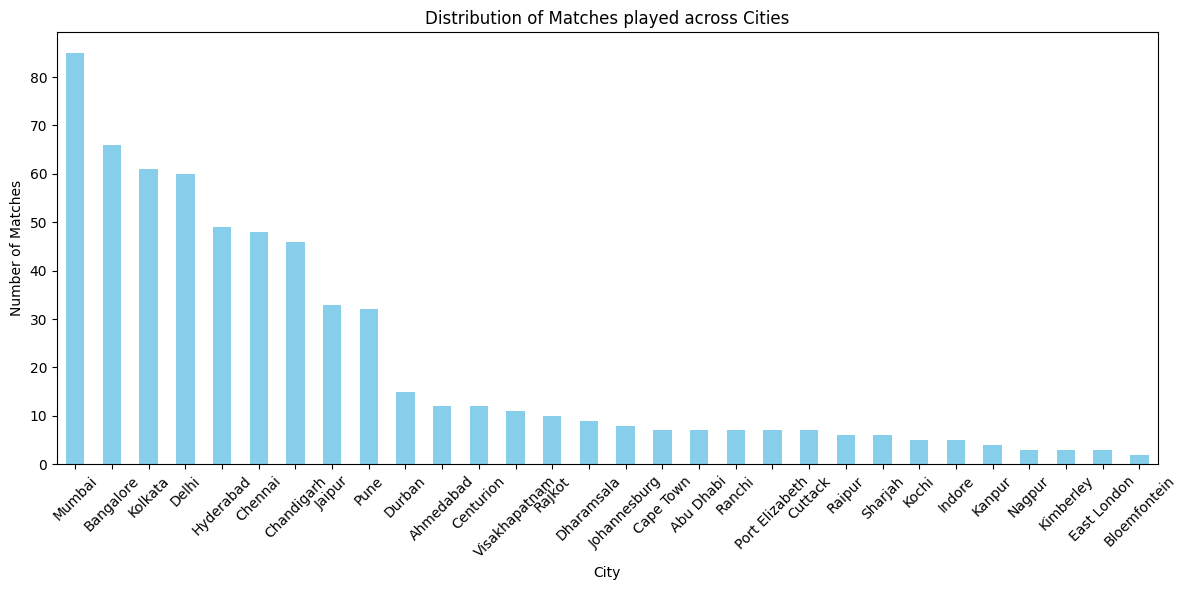

In [6]:
plt.figure(figsize=(12,6))
ipl_matches['city'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Matches played across Cities')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  7.Toss decision (bat/field) across seasons

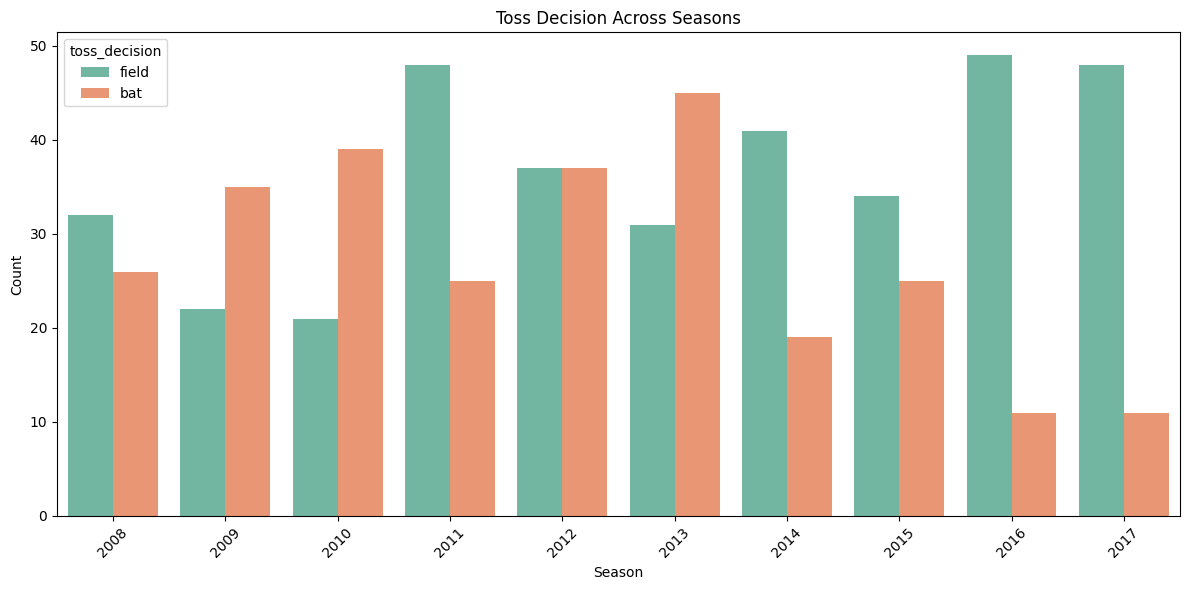

In [9]:

plt.figure(figsize=(12, 6))
sns.countplot(data=ipl_matches, x='season', hue='toss_decision', palette='Set2')
plt.title('Toss Decision Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 8.Trend of matches played over the years

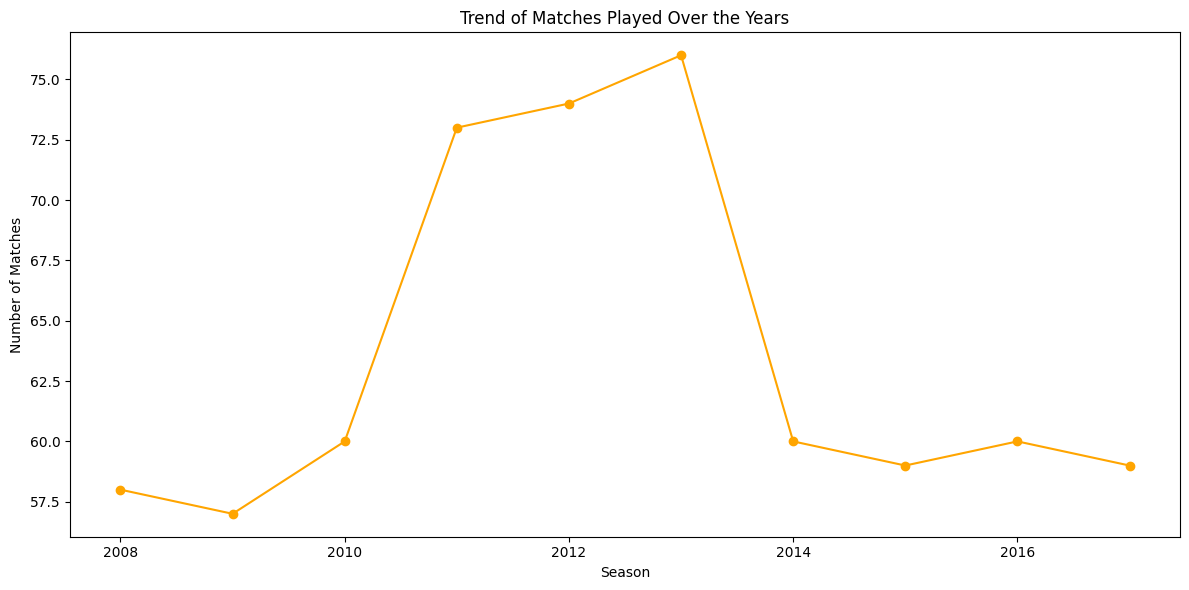

In [12]:
plt.figure(figsize=(12,6))
ipl_matches['season'].value_counts().sort_index().plot(kind='line',marker='o',color='orange')
plt.title('Trend of Matches Played Over the Years')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.show()

## 9.Venus that is hosting most matches

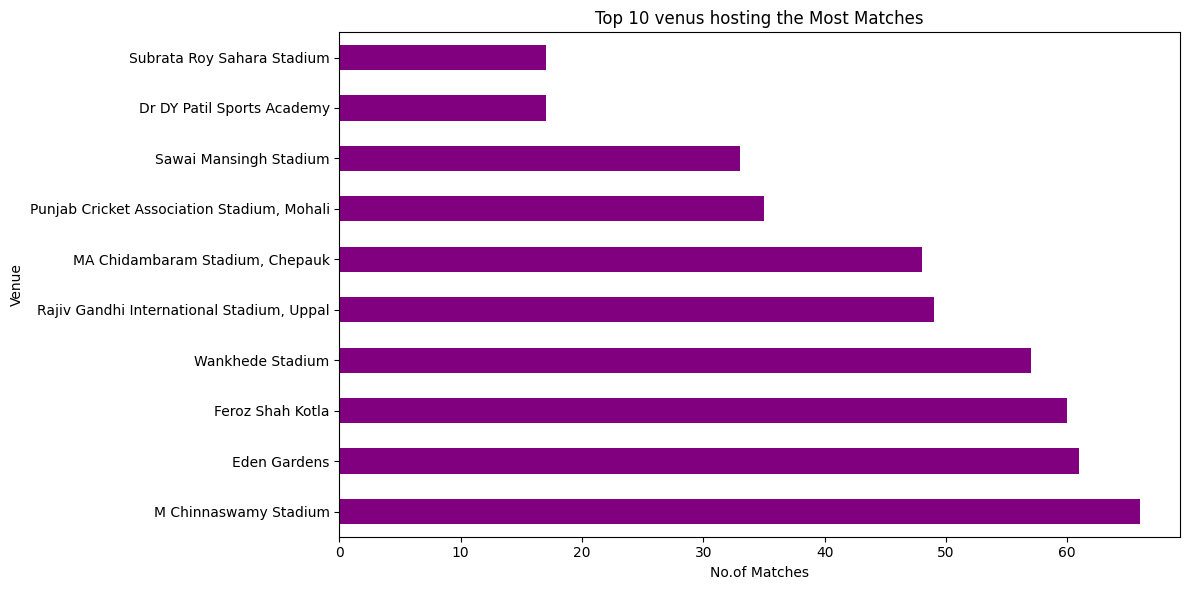

In [14]:
plt.figure(figsize=(12,6))
ipl_matches['venue'].value_counts().head(10).plot(kind='barh',color='purple')
plt.title('Top 10 venus hosting the Most Matches')
plt.xlabel('No.of Matches')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

## 10.Distribution of winning margins by runs

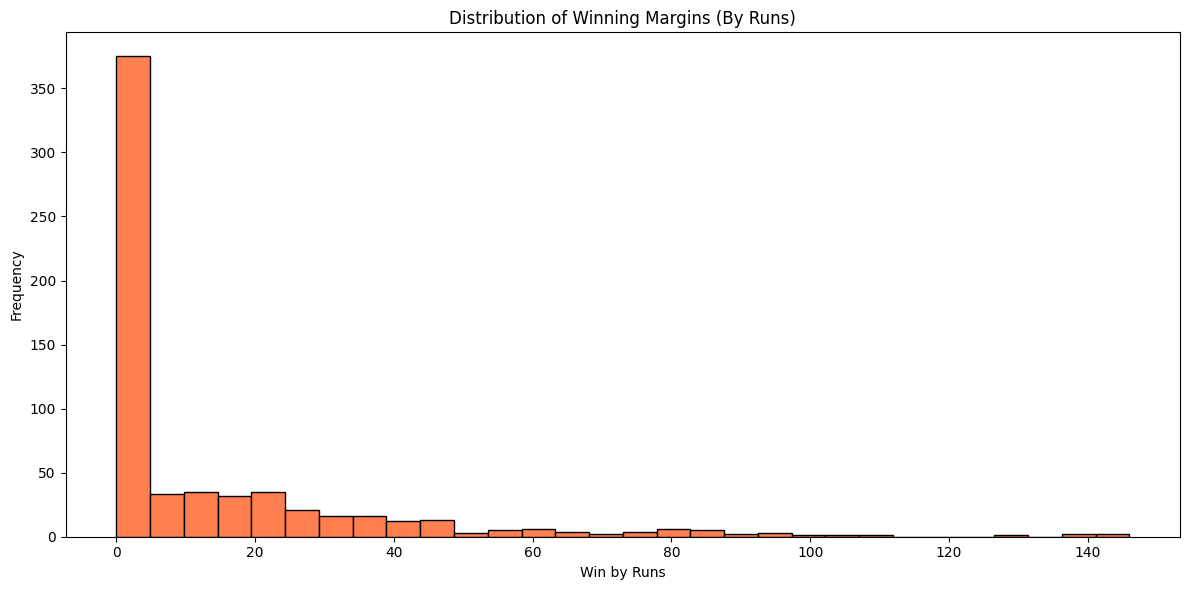

In [7]:
plt.figure(figsize=(12,6))
ipl_matches['win_by_runs'].plot(kind='hist',bins=30,color='coral',edgecolor='black')
plt.title('Distribution of Winning Margins (By Runs)')
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 11.Distribution of Winning margins by wickets

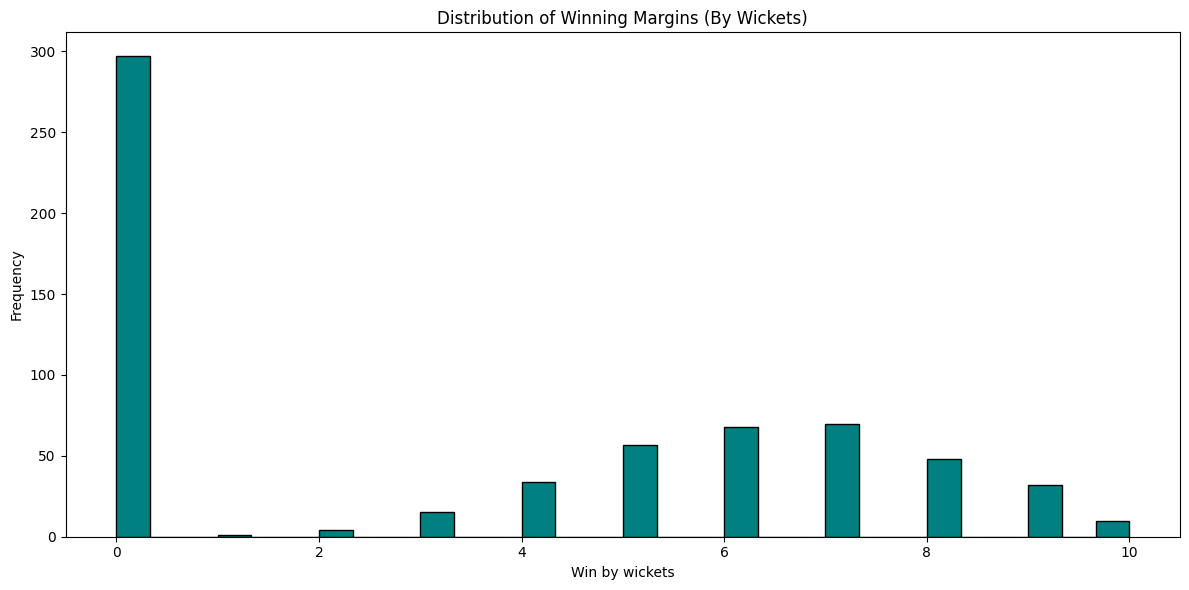

In [8]:
plt.figure(figsize=(12,6))
ipl_matches['win_by_wickets'].plot(kind='hist',bins=30,color='teal',edgecolor='black')
plt.title('Distribution of Winning Margins (By Wickets)')
plt.xlabel('Win by wickets')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 12.Most frequent "Player of the Match" award winners

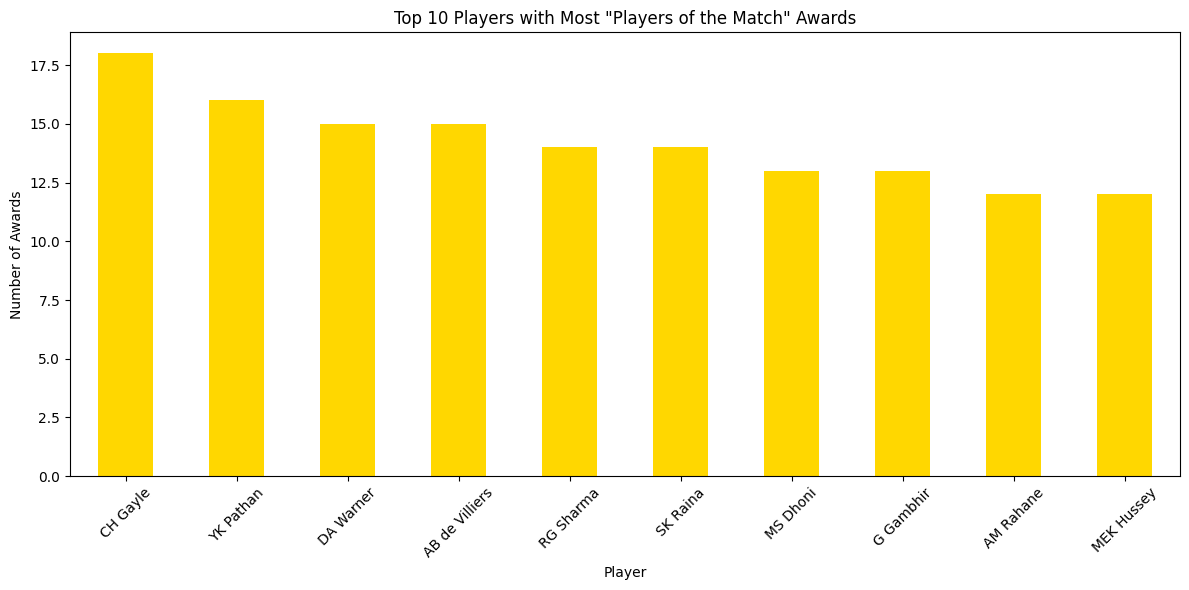

In [11]:
plt.figure(figsize=(12,6))
ipl_matches['player_of_match'].value_counts().head(10).plot(kind='bar', color='gold')
plt.title('Top 10 Players with Most "Players of the Match" Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 13.Toss winner vs match winner

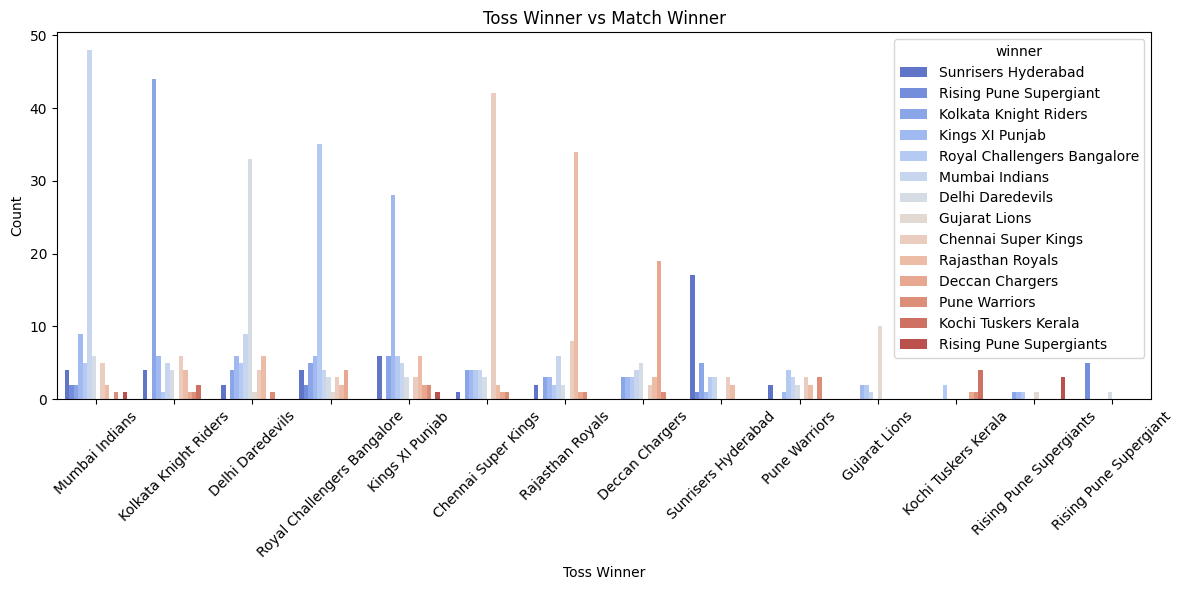

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=ipl_matches, x='toss_winner', hue='winner', order=ipl_matches['toss_winner'].value_counts().index ,palette='coolwarm')
plt.title('Toss Winner vs Match Winner')
plt.xlabel('Toss Winner')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()              
              

## 14. Toss decision vs match result

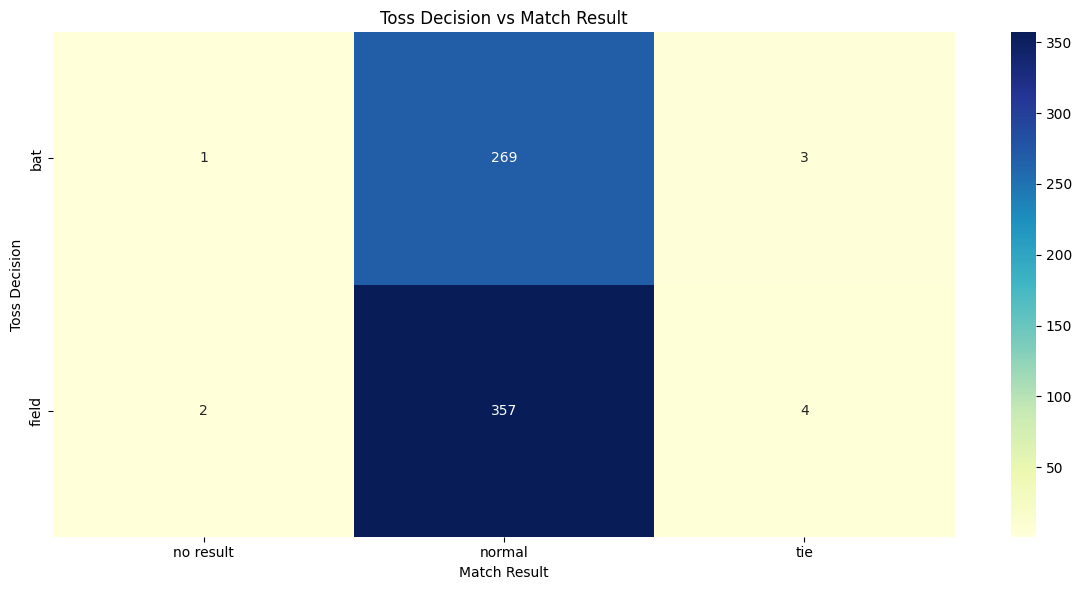

In [19]:

plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(ipl_matches['toss_decision'], ipl_matches['result']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Toss Decision vs Match Result')
plt.xlabel('Match Result')
plt.ylabel('Toss Decision')
plt.tight_layout()
plt.show()